In [1]:
import json

with open('C://Users/isang/OneDrive/Desktop/WM/data/WM811K_train_padded_resized_not_augmented.json', 'r') as f:
  data_pad_resize = json.load(f)
     

In [2]:
import pandas as pd

cols = data_pad_resize['columns']

dict_ = dict()

for col in cols:
  dict_[col] = list()

for i in range(len(cols)):
  for j in range(len(data_pad_resize['data'])):
    if i == 0:
      dict_[cols[i]].append(data_pad_resize['data'][j][i])
    elif i == 1:
      dict_[cols[i]].append(data_pad_resize['data'][j][i])


data_pad_resize = pd.DataFrame(dict_)
data_pad_resize.head()

,waferMap,failureType
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Center
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Center
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Center
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Center
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Center


In [4]:
data_pad_resize.tail(10)

,waferMap,failureType
136186,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",none
136187,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",none
136188,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",none
136189,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",none
136190,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",none
136191,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",none
136192,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",none
136193,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",none
136194,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",none
136195,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",none


In [ ]:
classes = ["Center", "Donut", "Edge-Loc", "Edge-Ring", "Loc", "Near-full", "Random", "Scratch", "none"]
training_aug_padded = [0] * 9

for i in range(9):
  training_aug_padded[i] = data_pad_resize[data_pad_resize['failureType'] == classes[i]]

for i in range(len(training_aug_padded)):
  training_aug_padded[i] =  training_aug_padded[i].reset_index(drop = True)

In [9]:
training_aug_padded[7].sample(10)

,waferMap,failureType
885,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Scratch
612,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Scratch
626,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Scratch
128,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Scratch
228,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Scratch
152,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Scratch
351,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Scratch
195,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Scratch
222,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Scratch
414,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Scratch


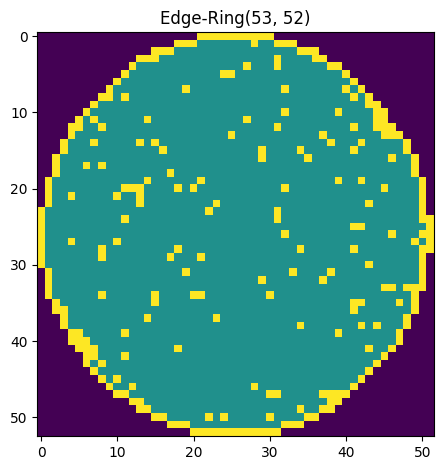

In [10]:
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(training_aug_padded[3]['waferMap'][6000])
plt.title(str(training_aug_padded[3]['failureType'][6000])+str(np.array(training_aug_padded[3]['waferMap'][6000]).shape))

plt.tight_layout()

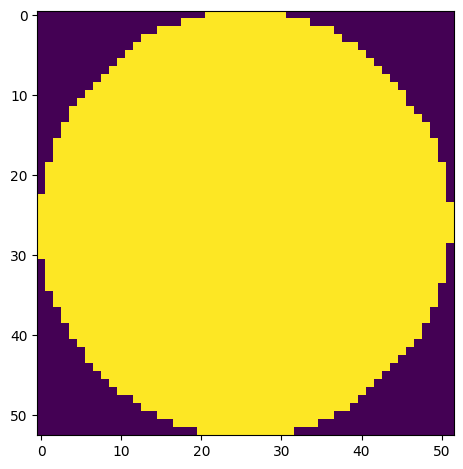

In [11]:
import copy

template = copy.deepcopy(training_aug_padded[3]['waferMap'][6000])
for i in range(len(template)):
  for j in range(len(template[0])):
    if(template[i][j] == 2):
      template[i][j] = 1

plt.imshow(template)

plt.tight_layout()

In [12]:
import random

# Euclidean distance
for n in range(2556):
  img = copy.deepcopy(template)
  for i in range(len(img)):
    for j in range(len(img[i])):
      if(img[i][j] == 1):
        dist = np.sqrt((i-26)**2 + (j-26)**2) 
        if(2.5 <= dist < 5):
          if(random.random() <= 0.1):
            img[i][j] = 2
        if(5 <= dist < 10):
          if(random.random() <= 0.5):
            img[i][j] = 2
        if(10 <= dist <= 17):
          if(random.random() <= 0.7):
            img[i][j] = 2
        if(17 < dist <= 20):
          if(random.random() <= 0.5):
            img[i][j] = 2
        if(20 < dist <= 24):
          if(random.random() <= 0.1):
            img[i][j] = 2
      # Let's add random mutations to the whole picture
      if(random.random() <= 0.05):
        if(img[i][j] == 1):
          img[i][j] = 2
        elif(img[i][j] == 2):
          img[i][j] = 1
  training_aug_padded[1].loc[training_aug_padded[1].shape[0]] = [img, np.array('Donut')]

3000


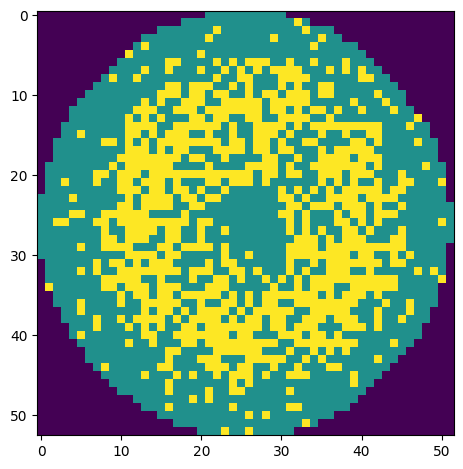

In [13]:
print(len(training_aug_padded[1]))
plt.imshow(training_aug_padded[1]['waferMap'][2999])

plt.tight_layout()

3000


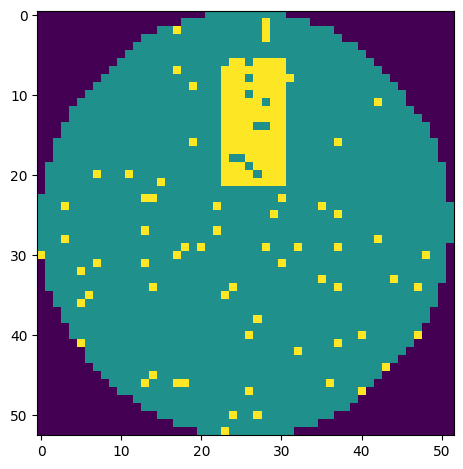

In [14]:
for n in range(189):
  img = copy.deepcopy(template)
  n_loc = random.randint(1, 3)
  for i in range(n_loc):
  # Loc doesn't have to be edge!
    loc_x = random.randint(12, 38)
    loc_y = random.randint(12, 38)
    ray_x = random.randint(2, 8)
    ray_y = random.randint(2, 8)
    for i in range(loc_x - ray_x, loc_x + ray_x):
      for j in range(loc_y - ray_y, loc_y + ray_y):
        if(img[i][j] == 1):
          img[i][j] = 2
        # Let's add random mutations to the loc anomaly
        if(random.random() <= 0.05):
          if(img[i][j] == 1):
            img[i][j] = 2
          elif(img[i][j] == 2):
            img[i][j] = 1
  # Let's add random mutations to the whole picture
  for i in range(len(img)):
      for j in range(len(img[i])):
        if(random.random() <= 0.03):
          if(img[i][j] == 1):
            img[i][j] = 2
          elif(img[i][j] == 2):
              img[i][j] = 1
  training_aug_padded[4].loc[training_aug_padded[4].shape[0]] = [img, np.array('Loc')]


print(len(training_aug_padded[4]))
plt.imshow(training_aug_padded[4]['waferMap'][2999])

plt.tight_layout()

3000


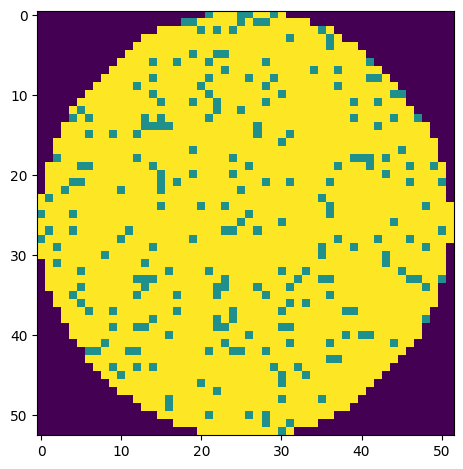

In [15]:
for n in range(2881):
  img = copy.deepcopy(template)
  for i in range(len(img)):
    for j in range(len(img[i])):
      if(img[i][j] != 0):
        if(random.random() <= 0.9):
          img[i][j] = 2
        else:
          img[i][j] = 1
  training_aug_padded[5].loc[training_aug_padded[5].shape[0]] = [img, np.array('Near-full')]

print(len(training_aug_padded[5]))
plt.imshow(training_aug_padded[5]['waferMap'][2999])

plt.tight_layout()

3000


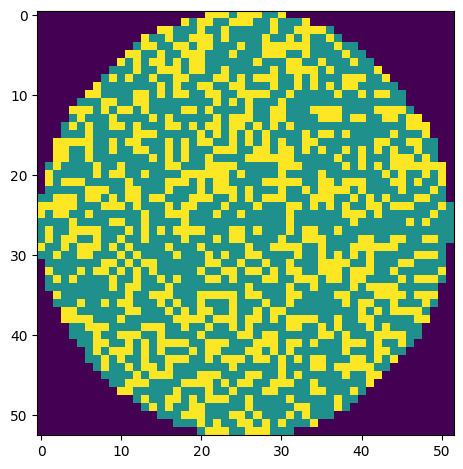

In [16]:
for n in range(2312):
  img = copy.deepcopy(template)
  max = random.uniform(0.25, 0.45)
  for i in range(len(img)):
    for j in range(len(img[i])):
      k = random.random()
      if(k <= max):
        if(img[i][j] == 1):
          img[i][j] = 2
        elif(img[i][j] == 2):
          img[i][j] = 1
  training_aug_padded[6].loc[training_aug_padded[6].shape[0]] = [img, np.array('Random')]

print(len(training_aug_padded[6]))
plt.imshow(training_aug_padded[6]['waferMap'][2999])

plt.tight_layout()

3000


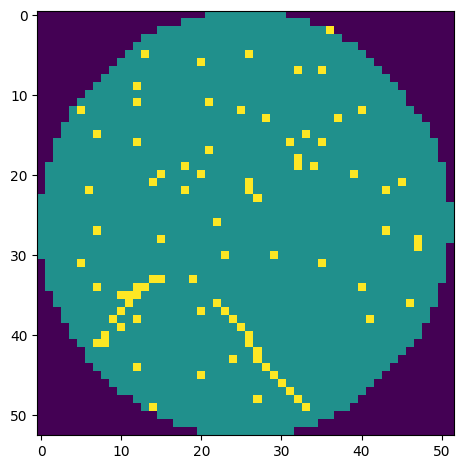

In [17]:
for n in range(2073):
  img = copy.deepcopy(template)
  n_scratch = random.randint(1, 3)

  for _ in range(n_scratch):
    # Scratch starting point
    y_start = random.randint(0, 52)
    x_start = random.randint(0, 51)
    dist = np.sqrt((y_start-26)**2 + (x_start-26)**2) 
    trovato = False
    while(not trovato):
      if((img[y_start][x_start] != 0) and (dist > 24)):
        trovato = True
      else:
        y_start = random.randint(0, 52)
        x_start = random.randint(0, 51)
        dist = np.sqrt((y_start-26)**2 + (x_start-26)**2)

    # Choosing moving direction and intensity 
    move = random.randint(8, 20)
    x = x_start
    y = y_start
    if(x_start < 26 and y_start > 26):
      # Starting from the bottom left
      for k in range(move):
        if(random.random() < 0.7):
          j = x + 1
        else:
          j = x
        i = y - 1
        if(i < 52 and j < 51):
          if(img[i][j] != 0):
            img[i][j] = 2
            if(random.random() < 0.05):
              img[i][j-1] = 2
            if(random.random() < 0.05):
              img[i][j+1] = 2
          x = j
          y = i
    elif(x_start < 26 and y_start <= 26):
      # Starting from the top left
      for k in range(move):
        if(random.random() < 0.7):
          j = x + 1
        else:
          j = x
        i = y + 1
        if(i < 52 and j < 51):
          if(img[i][j] != 0):
            img[i][j] = 2
            if(random.random() < 0.05):
              img[i][j-1] = 2
            if(random.random() < 0.05):
              img[i][j+1] = 2
          x = j
          y = i
    elif(x_start >= 26 and y_start > 26):
      # Starting from the bottom right
      for k in range(move):
        if(random.random() < 0.7):
          j = x - 1
        else:
          j = x
        i = y - 1
        if(i < 52 and j < 51):
          if(img[i][j] != 0):
            img[i][j] = 2
            if(random.random() < 0.05):
              img[i][j-1] = 2
            if(random.random() < 0.05):
              img[i][j+1] = 2
          x = j
          y = i
    elif(x_start >= 26 and y_start <= 26):
      # Starting from the top right
      for k in range(move):
        if(random.random() < 0.7):
          j = x - 1
        else:
          j = x
        i = y + 1
        if(i < 52 and j < 51):
          if(img[i][j] != 0):
            img[i][j] = 2
            if(random.random() < 0.05):
              img[i][j-1] = 2
            if(random.random() < 0.05):
              img[i][j+1] = 2
          x = j
          y = i

  # Let's add random mutations to the whole picture
  for i in range(len(img)):
    for j in range(len(img[i])):
      if(random.random() <= 0.03):
        if(img[i][j] == 1):
          img[i][j] = 2
        elif(img[i][j] == 2):
          img[i][j] = 1

  training_aug_padded[7].loc[training_aug_padded[7].shape[0]] = [img, np.array('Scratch')]

print(len(training_aug_padded[7]))
plt.imshow(training_aug_padded[7]['waferMap'][2999])

plt.tight_layout()

In [ ]:
aug_train_data = pd.concat([training_aug_padded[0],training_aug_padded[1],training_aug_padded[2],
                        training_aug_padded[3],training_aug_padded[4],training_aug_padded[5],
                        training_aug_padded[6],training_aug_padded[7],training_aug_padded[8]])
del training_aug_padded

aug_train_data['failureType'] = list(map(lambda x: str(x), aug_train_data['failureType']))

parsed = json.loads(aug_train_data.to_json(orient = "split"))
del aug_train_data

with open('C://Users/isang/OneDrive/Desktop/WM/data/WM811K_train_padded_resized_augmented.json','w') as f:
    json.dump(parsed, f)
del parsed

## Testing 

In [ ]:
!rm -rf WM811k_train

!mkdir WM811k_train

In [ ]:
import os
import matplotlib.image
import ijson

json_path       = 'C://Users/isang/OneDrive/Desktop/WM/data/WM811K_train_padded_resized_not_augmented.json'
output_base     = 'C://Users/isang/OneDrive/Desktop/WM/data/WM811K_train'
classes         = ["Center","Donut","Edge-Loc","Edge-Ring","Loc","Near-full","Random","Scratch","none"]
counters        = {cls: 0 for cls in classes}

with open(json_path, 'r') as f:
    cols = []
    for prefix, event, value in ijson.parse(f):
        if prefix == 'columns.item' and event == 'string':
            cols.append(value)
        elif prefix == 'columns' and event == 'end_array':
            break

idx_map  = cols.index('waferMap')
idx_type = cols.index('failureType')

# Create Folder for each classes
for cls in classes:
    os.makedirs(os.path.join(output_base, cls), exist_ok=True)


with open(json_path, 'r') as f:
    for record in ijson.items(f, 'data.item'):
        ftype = record[idx_type]
        if ftype not in counters:
            continue
        cnt = counters[ftype]

        if cnt % 1000 == 0:
            print(f'/WM811K_train/{ftype}/{cnt}.png')
        # Store Image in File   
        wafer_map = record[idx_map]
        out_path  = os.path.join(output_base, ftype, f'{cnt}.png')
        matplotlib.image.imsave(out_path, wafer_map)
        counters[ftype] += 1


/WM811K_train/Center/0.png
/WM811K_train/Center/1000.png
/WM811K_train/Center/2000.png
/WM811K_train/Center/3000.png
/WM811K_train/Donut/0.png
/WM811K_train/Edge-Loc/0.png
/WM811K_train/Edge-Loc/1000.png
/WM811K_train/Edge-Loc/2000.png
/WM811K_train/Edge-Loc/3000.png
/WM811K_train/Edge-Loc/4000.png
/WM811K_train/Edge-Ring/0.png
/WM811K_train/Edge-Ring/1000.png
/WM811K_train/Edge-Ring/2000.png
/WM811K_train/Edge-Ring/3000.png
/WM811K_train/Edge-Ring/4000.png
/WM811K_train/Edge-Ring/5000.png
/WM811K_train/Edge-Ring/6000.png
/WM811K_train/Edge-Ring/7000.png
/WM811K_train/Loc/0.png
/WM811K_train/Loc/1000.png
/WM811K_train/Loc/2000.png
/WM811K_train/Near-full/0.png
/WM811K_train/Random/0.png
/WM811K_train/Scratch/0.png
/WM811K_train/none/0.png
/WM811K_train/none/1000.png
/WM811K_train/none/2000.png
/WM811K_train/none/3000.png
/WM811K_train/none/4000.png
/WM811K_train/none/5000.png
/WM811K_train/none/6000.png
/WM811K_train/none/7000.png
/WM811K_train/none/8000.png
/WM811K_train/none/9000.png

MemoryError: 

In [20]:
with open('C://Users/isang/OneDrive/Desktop/WM/data/WM811K_train_padded_resized_augmented.json', 'r') as f:
  data_aug = json.load(f)

cols = data_aug['columns']

dict_ = dict()

for col in cols:
  dict_[col] = list()

for i in range(len(cols)):
  for j in range(len(data_aug['data'])):
    if i == 0:
      dict_[cols[i]].append(data_aug['data'][j][i])
    elif i == 1:
      dict_[cols[i]].append(data_aug['data'][j][i])

data_aug = pd.DataFrame(dict_)

classes = ["Center", "Donut", "Edge-Loc", "Edge-Ring", "Loc", "Near-full", "Random", "Scratch", "none"]
test_aug = [0] * 9

for i in range(9):
  test_aug[i] = data_aug[data_aug['failureType'] == classes[i]]
  test_aug[i] = test_aug[i].reset_index(drop = True)

In [ ]:
!rm -rf WM811K_craft_test
!rm -rf WM811K_orig_test

!mkdir WM811K_craft_test
!mkdir WM811K_orig_test

'rm'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'rm'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [22]:
import os

path = "C://Users/isang/OneDrive/Desktop/WM/data/WM811K_craft_test/"
for i in range(len(classes) - 1):
  os.mkdir(path+classes[i])

path = "C://Users/isang/OneDrive/Desktop/WM/data/WM811K_orig_test/"
for i in range(len(classes) - 1):
  os.mkdir(path+classes[i])

In [23]:
import matplotlib

for i in range(len(classes) - 1):
  for j in range(2900, 3000):
    if(j%10 == 0):
      print('/WM811K_craft_test/'+classes[i]+'/'+str(j)+'.png')
    matplotlib.image.imsave('C://Users/isang/OneDrive/Desktop/WM/data/WM811K_craft_test/'+classes[i]+'/'+str(j)+'.png', test_aug[i]['waferMap'].iloc[j])
     

/WM811K_craft_test/Center/2900.png
/WM811K_craft_test/Center/2910.png
/WM811K_craft_test/Center/2920.png
/WM811K_craft_test/Center/2930.png
/WM811K_craft_test/Center/2940.png
/WM811K_craft_test/Center/2950.png
/WM811K_craft_test/Center/2960.png
/WM811K_craft_test/Center/2970.png
/WM811K_craft_test/Center/2980.png
/WM811K_craft_test/Center/2990.png
/WM811K_craft_test/Donut/2900.png
/WM811K_craft_test/Donut/2910.png
/WM811K_craft_test/Donut/2920.png
/WM811K_craft_test/Donut/2930.png
/WM811K_craft_test/Donut/2940.png
/WM811K_craft_test/Donut/2950.png
/WM811K_craft_test/Donut/2960.png
/WM811K_craft_test/Donut/2970.png
/WM811K_craft_test/Donut/2980.png
/WM811K_craft_test/Donut/2990.png
/WM811K_craft_test/Edge-Loc/2900.png
/WM811K_craft_test/Edge-Loc/2910.png
/WM811K_craft_test/Edge-Loc/2920.png
/WM811K_craft_test/Edge-Loc/2930.png
/WM811K_craft_test/Edge-Loc/2940.png
/WM811K_craft_test/Edge-Loc/2950.png
/WM811K_craft_test/Edge-Loc/2960.png
/WM811K_craft_test/Edge-Loc/2970.png
/WM811K_craft_

In [24]:
for i in range(len(classes) - 1):
  for j in range(0, 100):
    if(j%10 == 0):
      print('/WM811K_orig_test/'+classes[i]+'/'+str(j)+'.png')
    matplotlib.image.imsave('C://Users/isang/OneDrive/Desktop/WM/data/WM811K_orig_test/'+classes[i]+'/'+str(j)+'.png', test_aug[i]['waferMap'].iloc[j])

/WM811K_orig_test/Center/0.png
/WM811K_orig_test/Center/10.png
/WM811K_orig_test/Center/20.png
/WM811K_orig_test/Center/30.png
/WM811K_orig_test/Center/40.png
/WM811K_orig_test/Center/50.png
/WM811K_orig_test/Center/60.png
/WM811K_orig_test/Center/70.png
/WM811K_orig_test/Center/80.png
/WM811K_orig_test/Center/90.png
/WM811K_orig_test/Donut/0.png
/WM811K_orig_test/Donut/10.png
/WM811K_orig_test/Donut/20.png
/WM811K_orig_test/Donut/30.png
/WM811K_orig_test/Donut/40.png
/WM811K_orig_test/Donut/50.png
/WM811K_orig_test/Donut/60.png
/WM811K_orig_test/Donut/70.png
/WM811K_orig_test/Donut/80.png
/WM811K_orig_test/Donut/90.png
/WM811K_orig_test/Edge-Loc/0.png
/WM811K_orig_test/Edge-Loc/10.png
/WM811K_orig_test/Edge-Loc/20.png
/WM811K_orig_test/Edge-Loc/30.png
/WM811K_orig_test/Edge-Loc/40.png
/WM811K_orig_test/Edge-Loc/50.png
/WM811K_orig_test/Edge-Loc/60.png
/WM811K_orig_test/Edge-Loc/70.png
/WM811K_orig_test/Edge-Loc/80.png
/WM811K_orig_test/Edge-Loc/90.png
/WM811K_orig_test/Edge-Ring/0.png

In [1]:
import os
import torch
from torch.utils.data import DataLoader, random_split, Dataset
from torchvision import datasets, transforms
import torch.nn.functional as F

! rm -rf C://Users/isang/OneDrive/Desktop/WM/data/WM811K_train/none

train_path      = 'C://Users/isang/OneDrive/Desktop/WM/data/WM811K_train'
craft_test_path = 'C://Users/isang/OneDrive/Desktop/WM/data/WM811K_craft_test'
orig_test_path  = 'C://Users/isang/OneDrive/Desktop/WM/data/WM811K_orig_test'

transform = transforms.Compose([
    transforms.Resize((53, 52)),
    transforms.ToTensor(),
])

full_dataset = datasets.ImageFolder(train_path, transform=transform)
num_classes  = len(full_dataset.classes)

val_size   = int(0.2 * len(full_dataset))
train_size = len(full_dataset) - val_size
train_dataset, val_dataset = random_split(
    full_dataset,
    [train_size, val_size],
    generator=torch.Generator().manual_seed(1)
)

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True,  num_workers=4, pin_memory=True)
val_loader   = DataLoader(val_dataset,   batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)

craft_test_dataset = datasets.ImageFolder(craft_test_path, transform=transform)
orig_test_dataset  = datasets.ImageFolder(orig_test_path,  transform=transform)

craft_test_loader  = DataLoader(craft_test_dataset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)
orig_test_loader   = DataLoader(orig_test_dataset,  batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)

'rm'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Simple CNN Model
class CraftNet(nn.Module):
    def __init__(self, num_classes=8):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3,  32, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=3, padding=1),
            
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=3, padding=1),
            
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.AdaptiveMaxPool2d((1,1))
        )
        self.classifier = nn.Linear(128, num_classes)
        
    def forward(self, x):
        x = self.features(x)           # (128,1,1)
        x = x.view(x.size(0), -1)      # flatten to (128)
        return self.classifier(x)      # (num_classes)


In [ ]:
device    = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model     = CraftNet(num_classes=8).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 3

for epoch in range(1, num_epochs+1):
    # — train —
    model.train()
    running_loss = 0.0
    running_correct = 0
    total = 0
    for imgs, labels in train_loader:
        imgs, labels = imgs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        out = model(imgs)                       
        loss = criterion(out, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * imgs.size(0)
        preds = out.argmax(dim=1)
        running_correct += (preds == labels).sum().item()
        total += imgs.size(0)
    
    train_loss = running_loss / total
    train_acc  = running_correct / total
    
    # — validation —
    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for imgs, labels in val_loader:
            imgs, labels = imgs.to(device), labels.to(device)
            out = model(imgs)
            val_loss += criterion(out, labels).item() * imgs.size(0)
            preds = out.argmax(dim=1)
            val_correct += (preds == labels).sum().item()
            val_total += imgs.size(0)
    val_loss /= val_total
    val_acc  = val_correct / val_total
    
    print(f"[Epoch {epoch}/{num_epochs}] "
          f"Train loss: {train_loss:.4f}, acc: {train_acc:.4f} | "
          f"Val loss:   {val_loss:.4f}, acc: {val_acc:.4f}")

[Epoch 1/3] Train loss: 0.7359, acc: 0.7201 | Val loss:   0.3930, acc: 0.8513
[Epoch 2/3] Train loss: 0.3317, acc: 0.8753 | Val loss:   0.2873, acc: 0.8919
[Epoch 3/3] Train loss: 0.2698, acc: 0.8970 | Val loss:   0.2704, acc: 0.9043


In [ ]:
def evaluate(loader, name):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for imgs, labels in loader:
            imgs, labels = imgs.to(device), labels.to(device)
            out = model(imgs)
            preds = out.argmax(dim=1)
            correct += (preds == labels).sum().item()
            total += imgs.size(0)
    print(f"{name} accuracy: {correct/total:.4f}")

evaluate(craft_test_loader, "Craft Test")
evaluate(orig_test_loader,  "Orig Test")

Craft Test accuracy: 0.9137
Orig Test accuracy: 0.8950
